# Import dataset

In [1]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import pickle
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

#set folder path
folder = 'data'
#fd = folder + '/uncorrupted_signal_folder'
#fd_km = fd + '/Clusters4096'
fd = folder
fd_km = fd

In [2]:
data_train_df = pd.read_pickle(fd_km + '/data_train_v1').reset_index().iloc[:,1:] #full set
data_test_df = pd.read_pickle(fd_km + '/data_test_v1').reset_index().iloc[:,1:]  

In [3]:
data_train_df

,ID,cycle,gauge1,gauge2,gauge3,RUL
0,1,0,0.000684,0.000693,0.000695,68053
1,1,500,0.000684,0.000693,0.000695,67553
2,1,1000,0.000684,0.000693,0.000695,67053
3,1,1500,0.000684,0.000693,0.000695,66553
4,1,2000,0.000684,0.000693,0.000695,66053
...,...,...,...,...,...,...
1385078,10000,66500,0.000118,0.000253,0.000761,2393
1385079,10000,67000,0.000097,0.000186,0.000755,1893
1385080,10000,67500,0.000078,0.000113,0.000743,1393
1385081,10000,68000,0.000060,0.000037,0.000718,893


In [4]:
data_train_df[data_train_df.ID == 1]

,ID,cycle,gauge1,gauge2,gauge3,RUL
0,1,0,0.000684,0.000693,0.000695,68053
1,1,500,0.000684,0.000693,0.000695,67553
2,1,1000,0.000684,0.000693,0.000695,67053
3,1,1500,0.000684,0.000693,0.000695,66553
4,1,2000,0.000684,0.000693,0.000695,66053
...,...,...,...,...,...,...
132,1,66000,0.000095,0.000178,0.000754,2053
133,1,66500,0.000078,0.000112,0.000743,1553
134,1,67000,0.000062,0.000044,0.000721,1053
135,1,67500,0.000047,-0.000022,0.000684,553


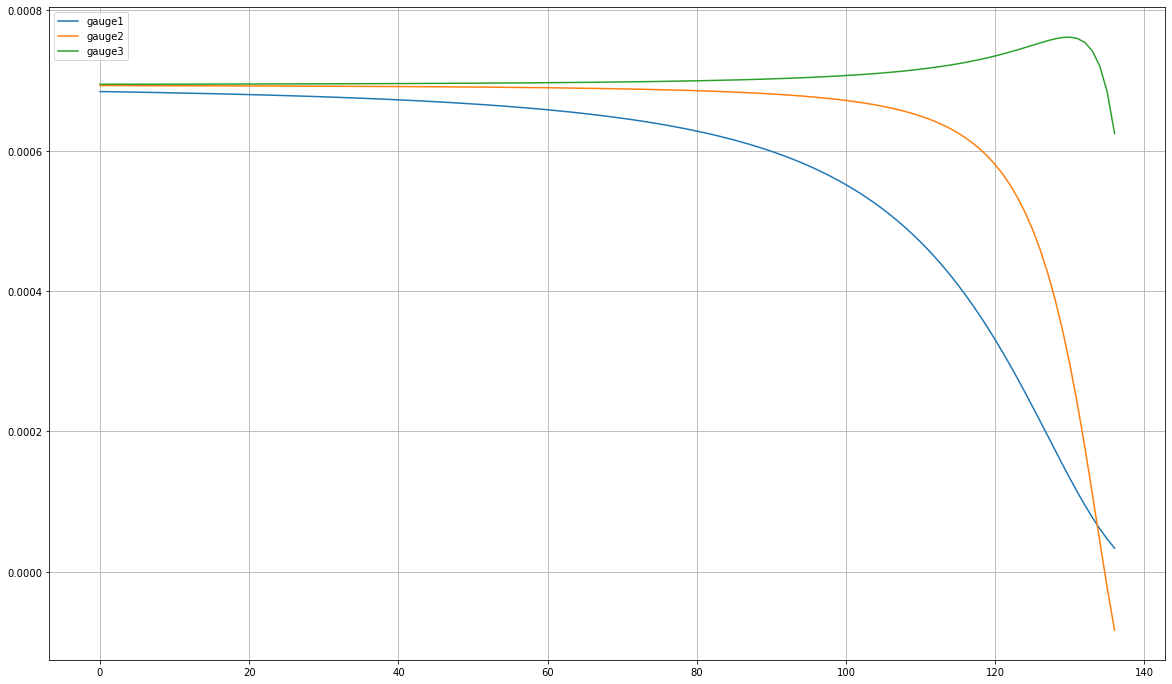

In [5]:
plt.figure(figsize=(20, 12))
plt.plot(data_train_df[data_train_df.ID == 1]['gauge1'],label= 'gauge1')
plt.plot(data_train_df[data_train_df.ID == 1][ 'gauge2'],label= 'gauge2')
plt.plot(data_train_df[data_train_df.ID == 1]['gauge3'], label= 'gauge3')
plt.grid()
plt.legend()
plt.show()

In [6]:
data_train_df.head(10)

,ID,cycle,gauge1,gauge2,gauge3,RUL
0,1,0,0.000684,0.000693,0.000695,68053
1,1,500,0.000684,0.000693,0.000695,67553
2,1,1000,0.000684,0.000693,0.000695,67053
3,1,1500,0.000684,0.000693,0.000695,66553
4,1,2000,0.000684,0.000693,0.000695,66053
5,1,2500,0.000683,0.000693,0.000695,65553
6,1,3000,0.000683,0.000693,0.000695,65053
7,1,3500,0.000683,0.000693,0.000695,64553
8,1,4000,0.000683,0.000693,0.000695,64053
9,1,4500,0.000683,0.000693,0.000695,63553


In [7]:
data_test_df[data_test_df.ID==1]

,ID,cycle,gauge1,gauge2,gauge3,RUL
0,1,0,0.000684,0.000693,0.000695,64540
1,1,500,0.000684,0.000693,0.000695,64040
2,1,1000,0.000684,0.000693,0.000695,63540
3,1,1500,0.000684,0.000693,0.000695,63040
4,1,2000,0.000684,0.000693,0.000695,62540
5,1,2500,0.000684,0.000693,0.000695,62040
6,1,3000,0.000683,0.000693,0.000695,61540
7,1,3500,0.000683,0.000693,0.000695,61040
8,1,4000,0.000683,0.000693,0.000695,60540
9,1,4500,0.000683,0.000693,0.000695,60040


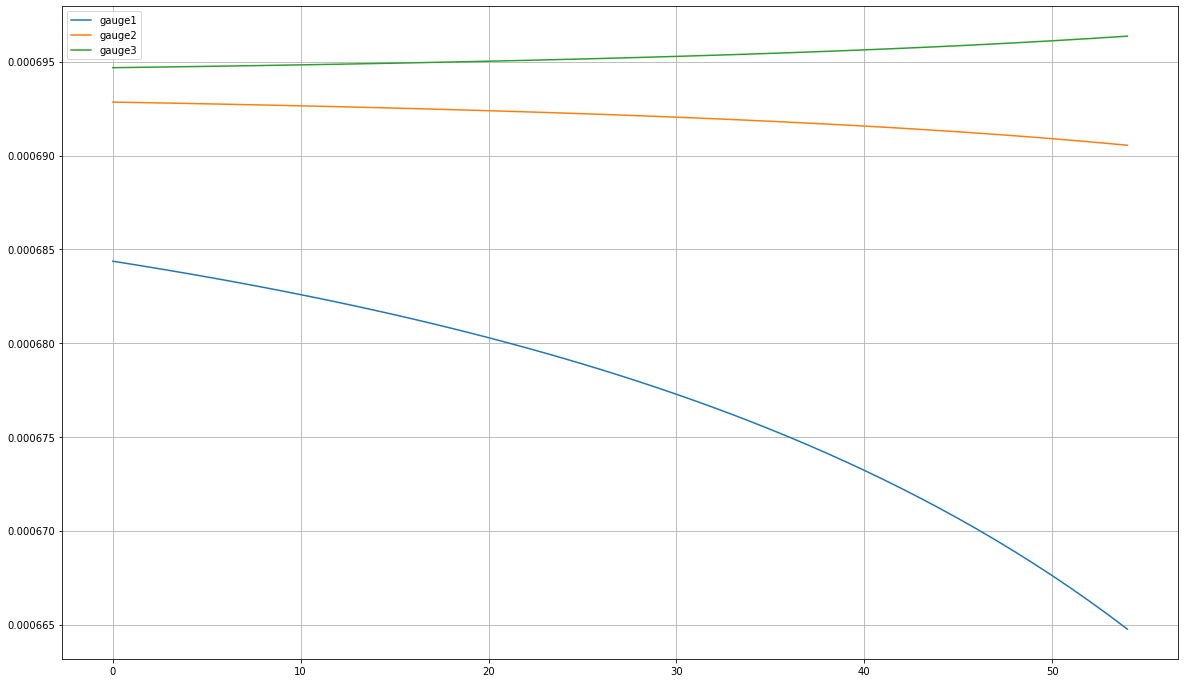

In [8]:
plt.figure(figsize=(20, 12))
plt.plot(data_test_df[data_test_df.ID == 1]['gauge1'],label= 'gauge1')
plt.plot(data_test_df[data_test_df.ID == 1][ 'gauge2'],label= 'gauge2')
plt.plot(data_test_df[data_test_df.ID == 1]['gauge3'], label= 'gauge3')
plt.grid()
plt.legend()
plt.show()

# Categorise RUL data

In [9]:
print(data_train_df.RUL.describe())
print(data_test_df.RUL.describe())

count    1.385083e+06
mean     3.477047e+04
std      2.023644e+04
min      0.000000e+00
25%      1.731200e+04
50%      3.462700e+04
75%      5.193900e+04
max      8.189600e+04
Name: RUL, dtype: float64
count     8782.000000
mean     45427.648144
std      15643.733322
min       3964.000000
25%      34177.000000
50%      46891.000000
75%      57867.500000
max      79327.000000
Name: RUL, dtype: float64


[    0.           221.6066482    886.4265928   1994.4598338
  3545.70637119  5540.16620499  7977.83933518 10858.72576177
 14182.82548476 17950.13850416 22160.66481994 26814.40443213
 31911.35734072 37451.52354571 43434.90304709 49861.49584488
 56731.30193906 64044.32132964 71800.55401662 80000.
 81896.        ]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


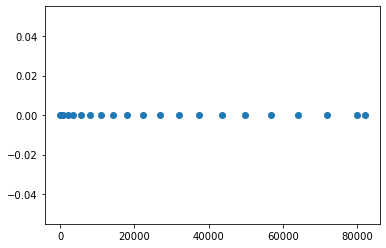

In [10]:
l=0.5
nb_bins = 20 # including one extra bin for RUL>upper_bin_bound
lower_bin_bound = 0
upper_bin_bound = 80000

bins = np.linspace(lower_bin_bound, upper_bin_bound**l, nb_bins)**(1/l)
bins = np.append(bins, data_train_df.RUL.max())

labels=[i for i in range(bins.shape[0]-1)]
plt.plot(bins,np.full(bins.shape[0],0),'o')
print(bins)
print(labels)

In [11]:
data_train_df['RUL_bin'] = pd.cut(data_train_df['RUL'], bins=bins, labels=labels)
data_test_df['RUL_bin'] = pd.cut(data_test_df['RUL'], bins=bins, labels=labels)

In [12]:
data_train_df['RUL_bin'] = pd.cut(data_train_df['RUL'], bins=bins, labels=labels)
data_test_df['RUL_bin'] = pd.cut(data_test_df['RUL'], bins=bins, labels=labels)

In [13]:
display(data_train_df)
display(data_test_df) 

,ID,cycle,gauge1,gauge2,gauge3,RUL,RUL_bin
0,1,0,0.000684,0.000693,0.000695,68053,17
1,1,500,0.000684,0.000693,0.000695,67553,17
2,1,1000,0.000684,0.000693,0.000695,67053,17
3,1,1500,0.000684,0.000693,0.000695,66553,17
4,1,2000,0.000684,0.000693,0.000695,66053,17
...,...,...,...,...,...,...,...
1385078,10000,66500,0.000118,0.000253,0.000761,2393,3
1385079,10000,67000,0.000097,0.000186,0.000755,1893,2
1385080,10000,67500,0.000078,0.000113,0.000743,1393,2
1385081,10000,68000,0.000060,0.000037,0.000718,893,2


,ID,cycle,gauge1,gauge2,gauge3,RUL,RUL_bin
0,1,0,0.000684,0.000693,0.000695,64540,17
1,1,500,0.000684,0.000693,0.000695,64040,16
2,1,1000,0.000684,0.000693,0.000695,63540,16
3,1,1500,0.000684,0.000693,0.000695,63040,16
4,1,2000,0.000684,0.000693,0.000695,62540,16
...,...,...,...,...,...,...,...
8777,100,22000,0.000670,0.000691,0.000696,43346,13
8778,100,22500,0.000670,0.000691,0.000696,42846,13
8779,100,23000,0.000669,0.000691,0.000696,42346,13
8780,100,23500,0.000669,0.000691,0.000696,41846,13


# Build sequences

In [14]:
#utils 
nb_gauges = 3
data_train = data_train_df[data_train_df.ID <= 100]
data_val = data_train_df[data_train_df.ID > 9900]

#prepare forecasting data
def gen_X_sequence(id_df, seq_length, seq_cols,timesteps_pred,  type_data = None):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    
    
    ind_start = 0
    
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0+ind_start, num_elements-seq_length+1-timesteps_pred), range(seq_length+ind_start, num_elements+1-timesteps_pred)):
        yield data_array[start:stop, :]
 

def gen_Y_sequence(id_df, seq_length, seq_cols,timesteps_pred, type_data = None):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    
    
    ind_start = 0
    
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0+ind_start, num_elements-seq_length+1-timesteps_pred), range(seq_length+ind_start, num_elements+1-timesteps_pred)):
        yield data_array[stop-1, :]#data_array[start+1:stop+1, :]
   



 #prepare data
seq_cols =  ['gauge'+str(i) for i in range(1,4)]#['label'+str(i) for i in range(1,4)]
seq_cols1 =  ['RUL_bin']
sequence_length = 30
timesteps_pred = 1



#training set
seq_gen = (list(gen_X_sequence(data_train[data_train['ID']==id], sequence_length, seq_cols, timesteps_pred, type_data= 'train')) 
                   for id in data_train['ID'].unique())
# generate sequences and convert to numpy array
dbX = np.concatenate(list(seq_gen))



seq_gen = (list(gen_Y_sequence(data_train[data_train['ID']==id], sequence_length, seq_cols1, timesteps_pred, type_data= 'train')) 
                   for id in data_train['ID'].unique())
# generate sequences and convert to numpy array
dbY = np.concatenate(list(seq_gen)).reshape(-1,)

# add one dimension
# dbX = dbX[..., np.newaxis]

print(dbX.shape)
print(dbY.shape)

#test set
seq_gen = (list(gen_X_sequence(data_val[data_val['ID']==id], sequence_length, seq_cols, timesteps_pred, type_data= 'train')) 
                   for id in data_val['ID'].unique())
# generate sequences and convert to numpy array
dbX_val = np.concatenate(list(seq_gen))

seq_gen = (list(gen_Y_sequence(data_val[data_val['ID']==id], sequence_length, seq_cols1, timesteps_pred, type_data= 'train')) 
                   for id in data_val['ID'].unique())
# generate sequences and convert to numpy array
dbY_val = np.concatenate(list(seq_gen)).reshape(-1,)

# add one dimension
# dbX_val = dbX_val[..., np.newaxis]

# dbX_val = (dbX_val + 1)/2
# dbY_val = (dbY_val + 1)/2
print(dbX_val.shape)
print(dbY_val.shape)

(10956, 30, 3)
(10956,)
(10937, 30, 3)
(10937,)


# One-hot encoding

In [15]:
#from tensorflow.keras.utils import to_categorical

#dbY = to_categorical(dbY,nb_bins)
#dbY_val = to_categorical(dbY_val,nb_bins)

#dbY = dbY[..., np.newaxis]
#dbY_val = dbY_val[..., np.newaxis]

#print(dbY.shape)
#print(dbY_val.shape)

# Data Balance Analysis

In [16]:
RUL_bin_freq = np.zeros(bins.shape[0]-1)

for RUL_bin in range(bins.shape[0]-1):
    RUL_bin_freq[RUL_bin] = data_train.loc[data_train['RUL_bin'] == RUL_bin].size

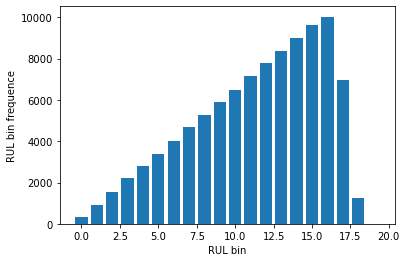

In [17]:
plt.bar(labels, RUL_bin_freq)
plt.ylabel('RUL bin frequence')
plt.xlabel('RUL bin')
plt.show()

# Test Model

In [18]:
import numpy as np
import keras
from keras import backend as K
from keras.models import *
from keras.layers import *
from tcn import *

In [19]:
# load model from file
loaded_json = open('PIR_CNN_Model3_2_29042021185229.json', 'r').read()
loadedModel1 = model_from_json(loaded_json, custom_objects={'TCN': TCN})

tcn_full_summary(loadedModel1, expand_residual_blocks=False)

# restore weights
loadedModel1.load_weights('PIR_CNN_Model3_2_weights_29042021185229.h5')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30, 3)]           0         
_________________________________________________________________
residual_block_0 (ResidualBl [(None, 30, 20), (None, 3 5722      
________________________________________________

In [20]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (true_positives + possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (true_positives + predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [40]:
loadedModel1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

loss, accuracy, f1_score, precision, recall = loadedModel1.evaluate(dbX_val, dbY_val, verbose=0)

In [41]:
print('loss: ' + str(loss))
print('accuracy: ' + str(accuracy))
print('f1_score: ' + str(f1_score))
print('precision: ' + str(precision))
print('recall: ' + str(recall))

loss: 0.634306788444519
accuracy: 0.7178385257720947
f1_score: 0.6715787649154663
precision: 0.6727052927017212
recall: 0.6704668998718262


In [23]:
def precision_bins(model, dbX, dbY, bins):
    num_corr_pred = np.zeros(bins.shape[0]-1)
    num_false_pred = np.zeros(bins.shape[0]-1)

    dbY_pred = model.predict(dbX).argmax(axis=1)

    for bin in range(bins.shape[0]-1):    
        num_corr_pred[bin] = np.sum(np.equal(dbY_pred[dbY_pred==bin],
                                             dbY[dbY_pred==bin]))
    
        num_false_pred[bin] =  dbY_pred[dbY_pred==bin].shape[0] - num_corr_pred[bin]

    precision_bins = np.divide(num_corr_pred, np.add(num_corr_pred, num_false_pred))
    
    return precision_bins

In [24]:
def recall_bins(model, dbX, dbY, bins):
    num_corr_pred = np.zeros(bins.shape[0]-1)
    num_false_pred = np.zeros(bins.shape[0]-1)

    dbY_pred = model.predict(dbX_val).argmax(axis=1)

    for bin in range(bins.shape[0]-1):    
        num_corr_pred[bin] = np.sum(np.equal(dbY_pred[dbY==bin],
                                             dbY[dbY==bin]))
        num_false_pred[bin] =  dbY_pred[dbY==bin].shape[0] - num_corr_pred[bin]

    recall_bins = np.divide(num_corr_pred, np.add(num_corr_pred, num_false_pred))
    
    return recall_bins

In [25]:
def f1_bins(precision_bins, recall_bins):
    f1_bins = np.divide(2 * np.multiply(precision_bins, recall_bins), np.add(precision_bins, recall_bins))
    
    return f1_bins

In [26]:
precision_bins = precision_bins(loadedModel1, dbX_val, dbY_val, bins)

<ipython-input-23-005f613a2d7d>:13: RuntimeWarning: invalid value encountered in true_divide
  precision_bins = np.divide(num_corr_pred, np.add(num_corr_pred, num_false_pred))


In [27]:
recall_bins = recall_bins(loadedModel1, dbX_val, dbY_val, bins)

<ipython-input-24-02155843edac>:12: RuntimeWarning: invalid value encountered in true_divide
  recall_bins = np.divide(num_corr_pred, np.add(num_corr_pred, num_false_pred))


In [28]:
f1_bins = f1_bins(precision_bins, recall_bins)

In [34]:
f1_bins

array([       nan, 0.94520548, 0.96      , 0.93597561, 0.89185905,
       0.9122807 , 0.87666034, 0.82900763, 0.80666667, 0.71028037,
       0.66420664, 0.66262815, 0.65671642, 0.6453958 , 0.64257028,
       0.63760218, 0.00892857,        nan,        nan,        nan])

In [29]:
dbY_pred = loadedModel1.predict(dbX_val).argmax(axis=1)

In [45]:
from sklearn.metrics import f1_score
f1_score(dbY_val, dbY_pred, average=None)

array([0.94520548, 0.96      , 0.93597561, 0.89185905, 0.9122807 ,
       0.87666034, 0.82900763, 0.80666667, 0.71028037, 0.66420664,
       0.66262815, 0.65671642, 0.6453958 , 0.64257028, 0.63760218,
       0.00892857, 0.        ])

In [54]:
f1_score(dbY_val, dbY_pred, average='weighted')

0.7125343714027291

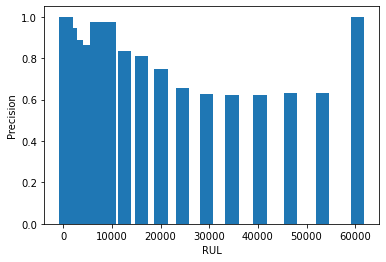

In [31]:
bins_average = np.zeros(bins.shape[0]-1)

for i in range(bins.shape[0]-1):
    bins_average[i] = (bins[i] + bins[i+1])/2

plt.bar(bins_average, precision_bins, bins[-1]/30)
plt.ylabel('Precision')
plt.xlabel('RUL')
plt.show()

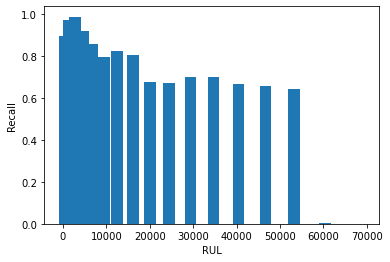

In [32]:
bins_average = np.zeros(bins.shape[0]-1)

for i in range(bins.shape[0]-1):
    bins_average[i] = (bins[i] + bins[i+1])/2

plt.bar(bins_average, recall_bins, bins[-1]/30)
plt.ylabel('Recall')
plt.xlabel('RUL')
plt.show()

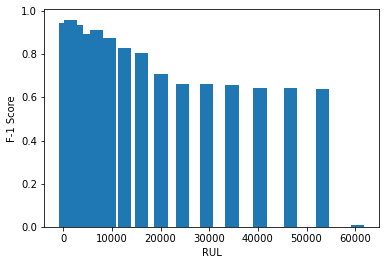

In [33]:
bins_average = np.zeros(bins.shape[0]-1)

for i in range(bins.shape[0]-1):
    bins_average[i] = (bins[i] + bins[i+1])/2

plt.bar(bins_average, f1_bins, bins[-1]/30)
plt.ylabel('F-1 Score')
plt.xlabel('RUL')
plt.show()

In [59]:
label = dbY_val[0]
print('The actual RUL is: ' + str(bins[label]) + '-' + str(bins[label+1]))
label = np.argmax(loadedModel1.predict(dbX_val)[0])
print('The predicted RUL is: ' + str(bins[label]) + '-' + str(bins[label+1]))

The actual RUL is: 56731.30193905817-64044.32132963988
The predicted RUL is: 49861.495844875346-56731.30193905817


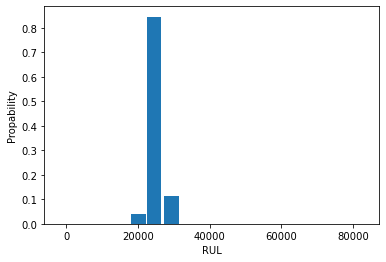

In [58]:
bins_average = np.zeros(bins.shape[0]-1)

for i in range(bins.shape[0]-1):
    bins_average[i] = (bins[i] + bins[i+1])/2

plt.bar(bins_average, loadedModel1.predict(dbX_val[400:401])[0], bins[-1]/20)
plt.ylabel('Propability')
plt.xlabel('RUL')
plt.show()